In [1]:
import numpy as np
import re

data = """Deep learning (also known as deep structured learning) is
part of a broader family of machine learning methods based on
artificial neural networks with representation learning. Learning can
be supervised, semi-supervised or unsupervised. Deep-learning
architectures such as deep neural networks, deep belief networks, deep
reinforcement learning, recurrent neural networks, convolutional
neural networks and Transformers have been applied to fields including
computer vision, speech recognition, natural language processing,
machine translation, bioinformatics, drug design, medical image
analysis, climate science, material inspection and board game
programs, where they have produced results comparable to and in some
cases surpassing human expert performance."""
data
{"type":"string"}
sentences = data.split('.')
sentences

['Deep learning (also known as deep structured learning) is\npart of a broader family of machine learning methods based on\nartificial neural networks with representation learning',
 ' Learning can\nbe supervised, semi-supervised or unsupervised',
 ' Deep-learning\narchitectures such as deep neural networks, deep belief networks, deep\nreinforcement learning, recurrent neural networks, convolutional\nneural networks and Transformers have been applied to fields including\ncomputer vision, speech recognition, natural language processing,\nmachine translation, bioinformatics, drug design, medical image\nanalysis, climate science, material inspection and board game\nprograms, where they have produced results comparable to and in some\ncases surpassing human expert performance',
 '']

In [2]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)
clean_sent

['deep learning also known as deep structured learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 'learning can be supervised semi supervised or unsupervised',
 'deep learning architectures such as deep neural networks deep belief networks deep reinforcement learning recurrent neural networks convolutional neural networks and transformers have been applied to fields including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection and board game programs where they have produced results comparable to and in some cases surpassing human expert performance']

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[2, 1, 12, 13, 6, 2, 14, 1, 15, 16, 7, 17, 18, 19, 7, 8, 1, 20, 21, 22, 23, 4, 3, 24, 25, 1], [1, 26, 27, 9, 28, 9, 29, 30], [2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2, 34, 1, 35, 4, 3, 36, 4, 3, 5, 37, 10, 38, 39, 11, 40, 41, 42, 43, 44, 45, 46, 47, 48, 8, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61, 62, 63, 64, 10, 65, 66, 67, 11, 5, 68, 69, 70, 71, 72, 73, 74]]


In [5]:
index_to_word = {}
word_to_index = {}

In [6]:
for i, sequence in enumerate(sequences):

    word_in_sentence = clean_sent[i].split()

    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value
print(index_to_word, "\n")
print(word_to_index)

{2: 'deep', 1: 'learning', 12: 'also', 13: 'known', 6: 'as', 14: 'structured', 15: 'is', 16: 'part', 7: 'of', 17: 'a', 18: 'broader', 19: 'family', 8: 'machine', 20: 'methods', 21: 'based', 22: 'on', 23: 'artificial', 4: 'neural', 3: 'networks', 24: 'with', 25: 'representation', 26: 'can', 27: 'be', 9: 'supervised', 28: 'semi', 29: 'or', 30: 'unsupervised', 31: 'architectures', 32: 'such', 33: 'belief', 34: 'reinforcement', 35: 'recurrent', 36: 'convolutional', 5: 'and', 37: 'transformers', 10: 'have', 38: 'been', 39: 'applied', 11: 'to', 40: 'fields', 41: 'including', 42: 'computer', 43: 'vision', 44: 'speech', 45: 'recognition', 46: 'natural', 47: 'language', 48: 'processing', 49: 'translation', 50: 'bioinformatics', 51: 'drug', 52: 'design', 53: 'medical', 54: 'image', 55: 'analysis', 56: 'climate', 57: 'science', 58: 'material', 59: 'inspection', 60: 'board', 61: 'game', 62: 'programs', 63: 'where', 64: 'they', 65: 'produced', 66: 'results', 67: 'comparable', 68: 'in', 69: 'some', 

In [7]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2
contexts = []
targets = []

In [8]:
for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1],
sequence[i + 2]]

        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[2, 1, 13, 6], [1, 12, 6, 2], [12, 13, 2, 14], [13, 6, 14, 1], [6, 2, 1, 15], [2, 14, 15, 16], [14, 1, 16, 7], [1, 15, 7, 17], [15, 16, 17, 18], [16, 7, 18, 19], [7, 17, 19, 7], [17, 18, 7, 8], [18, 19, 8, 1], [19, 7, 1, 20], [7, 8, 20, 21], [8, 1, 21, 22], [1, 20, 22, 23], [20, 21, 23, 4], [21, 22, 4, 3], [22, 23, 3, 24], [23, 4, 24, 25], [4, 3, 25, 1], [1, 26, 9, 28], [26, 27, 28, 9], [27, 9, 9, 29], [9, 28, 29, 30], [2, 1, 32, 6], [1, 31, 6, 2], [31, 32, 2, 4], [32, 6, 4, 3], [6, 2, 3, 2], [2, 4, 2, 33], [4, 3, 33, 3], [3, 2, 3, 2], [2, 33, 2, 34], [33, 3, 34, 1], [3, 2, 1, 35], [2, 34, 35, 4], [34, 1, 4, 3], [1, 35, 3, 36], [35, 4, 36, 4], [4, 3, 4, 3], [3, 36, 3, 5], [36, 4, 5, 37], [4, 3, 37, 10], [3, 5, 10, 38], [5, 37, 38, 39], [37, 10, 39, 11], [10, 38, 11, 40], [38, 39, 40, 41], [39, 11, 41, 42], [11, 40, 42, 43], [40, 41, 43, 44], [41, 42, 44, 45], [42, 43, 45, 46], [43, 44, 46, 47], [44, 45, 47, 48], [45, 46, 48, 8], [46, 47, 8, 49], [47, 48, 49, 50], [48, 8, 50, 51], [8, 

In [9]:
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['deep', 'learning', 'known', 'as']  ->  also
['learning', 'also', 'as', 'deep']  ->  known
['also', 'known', 'deep', 'structured']  ->  as
['known', 'as', 'structured', 'learning']  ->  deep
['as', 'deep', 'learning', 'is']  ->  structured


In [10]:
X = np.array(contexts)
Y = np.array(targets)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda

In [12]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size,
input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
 ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=80)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.0210 - loss: 4.3177  
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0902 - loss: 4.3107
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0689 - loss: 4.3034
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0710 - loss: 4.2929
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0714 - loss: 4.2783
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0636 - loss: 4.2554
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0597 - loss: 4.2256
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0636 - loss: 4.1782
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0440 - loss: 4.1486
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0401 - loss: 4.0923    
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0597 - loss: 3.9947
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0675 - loss: 3.

<Axes: >

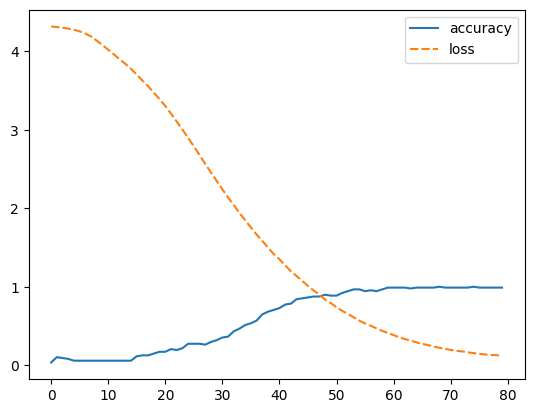

In [14]:
import seaborn as sns
sns.lineplot(model.history.history)

In [15]:
from sklearn.decomposition import PCA

print("""Deep learning (also known as deep structured learning) is part
of a broader family of machine learning methods based on artificial
neural networks with representation learning. Learning can be
supervised, semi-supervised or unsupervised. Deep-learning
architectures such as deep neural networks, deep belief networks, deep
reinforcement learning, recurrent neural networks, convolutional
neural networks and Transformers have been applied to fields including
computer vision, speech recognition, natural language processing,
machine translation, bioinformatics, drug design, medical image
analysis, climate science, material inspection and board game
programs, where they have produced results comparable to and in some
cases surpassing human expert performance.""")

Deep learning (also known as deep structured learning) is part
of a broader family of machine learning methods based on artificial
neural networks with representation learning. Learning can be
supervised, semi-supervised or unsupervised. Deep-learning
architectures such as deep neural networks, deep belief networks, deep
reinforcement learning, recurrent neural networks, convolutional
neural networks and Transformers have been applied to fields including
computer vision, speech recognition, natural language processing,
machine translation, bioinformatics, drug design, medical image
analysis, climate science, material inspection and board game
programs, where they have produced results comparable to and in some
cases surpassing human expert performance.


In [16]:
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]


In [17]:
for sent in test_sentenses:
    test_words = sent.split(" ")

    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])

    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= deep 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= been 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 


